## Libraries and Data

In [1]:
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm
import os

### Load Data

In [2]:
DATA_DIR = os.environ
current_path = os.getcwd()
df = pd.read_csv(current_path+ "/dataset/Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Normal Distribution

<AxesSubplot: ylabel='Density'>

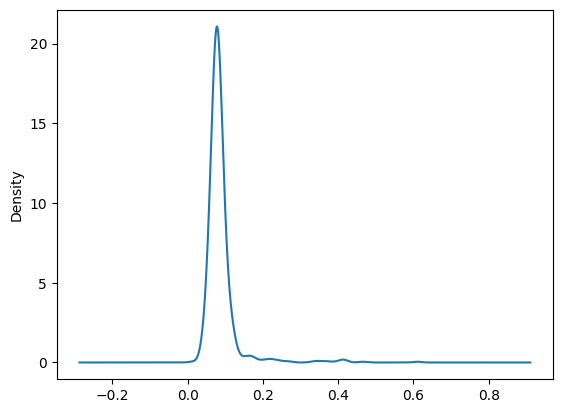

In [3]:
#  plot chlorides dist.
df.chlorides.plot.density()

In [4]:
# how many obs. wihtin 1 std

chlorides_std_for_1 = df.loc[((df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std())
      & (df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std()))]
chlorides_std_for_1.chlorides.count()/df.chlorides.count()

0.9480925578486554

In [5]:
# how many obs. wihtin 2 std

chlorides_std_for_2 = df.loc[((df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std())
      & (df.chlorides >= df.chlorides.mean() - 2 * df.chlorides.std()))]
chlorides_std_for_2.chlorides.count()/df.chlorides.count()

0.9718574108818011

In [6]:
# how many obs. wihtin 3 std

chlorides_std_for_3 = df.loc[((df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std())
      & (df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std()))]
chlorides_std_for_3.chlorides.count()/df.chlorides.count()

0.9806128830519074

### Exercise answer

<AxesSubplot: ylabel='Density'>

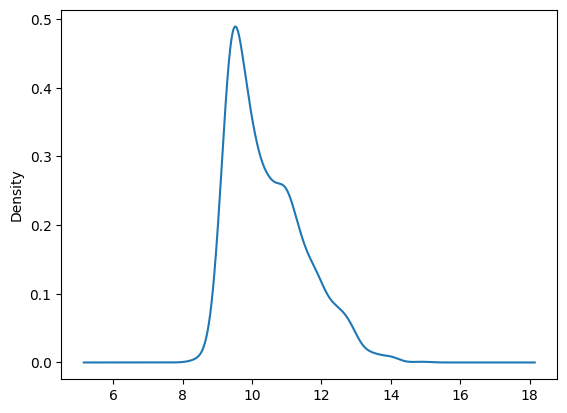

In [7]:
#  plot alcohol dist.
df.alcohol.plot.density()

In [8]:
# how many obs. wihtin 3 std

alcohol_observ_count_for_3 = df.loc[((df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std())
      & (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std()))]
alcohol_observ_count_for_3.alcohol.count()/df.alcohol.count()

0.9949968730456535

### Shapiro-Wilks Tes

In [16]:
stat,p = st.shapiro(df.chlorides)
print(f"stat is {stat}, p-value is {p}");

if p>0.05:
    print("Sample looks Gaussian/Normal (fail to reejct H0)")
else:
    print("Sample doesn't look Gaussian/Normal (reejct H0)")

stat is 0.4842468500137329, p-value is 0.0
Sample doesn't look Gaussian/Normal (reejct H0)


In [18]:
stat_sulp,p_sulp = st.shapiro(df.sulphates)
print(f"stat is {stat_sulp}, p-value is {p_sulp}");

if p_sulp>0.05:
    print("Sample looks Gaussian/Normal (fail to reejct H0)")
else:
    print("Sample doesn't look Gaussian/Normal (reejct H0)")


stat is 0.8330425024032593, p-value is 5.821617678881608e-38
Sample doesn't look Gaussian/Normal (reejct H0)


### Standart Error

In [19]:
st.sem(df.alcohol)

0.026650018979018173

In [21]:
# Making computatins: Standart Dev. / sqrt of observations
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

#### Exercise answer

In [22]:
st.sem(df.pH)

0.0038608683325203784

In [23]:
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784